https://github.com/vihar/visualising-cnns

In [1]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

In [2]:
num_workers = 0
batch_size = 20

transform = transforms.ToTensor()
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

 99%|███████████████████████████████████████████████████████████████████▍| 9838592/9912422 [00:30<00:00, 202780.94it/s]

Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



0it [00:00, ?it/s]
  0%|                                                                                        | 0/28881 [00:00<?, ?it/s]
32768it [00:00, 52795.95it/s]                                                                                          

Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



0it [00:00, ?it/s]
 93%|███████████████████████████████████████████████████████████████▌    | 1540096/1648877 [00:07<00:00, 315397.21it/s]
1654784it [00:07, 210143.57it/s]                                                                                       

Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



0it [00:00, ?it/s]
  0%|                                                                                         | 0/4542 [00:00<?, ?it/s]
8192it [00:00, 19464.18it/s]                                                                                           

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw
Processing...
Done!


9920512it [00:50, 202780.94it/s]                                                                                       

<class 'torch.Tensor'>


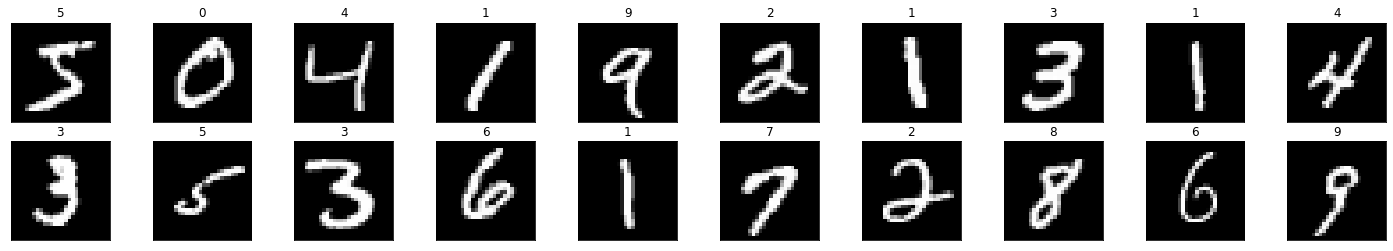

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

dataiter = iter(train_loader)
images,labels = dataiter.next()
print(type(labels))
images = images.numpy()

fig = plt.figure(figsize=(25,4))
for image in np.arange(20):
    ax = fig.add_subplot(2,20/2,image+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(images[image]),cmap='gray')
    ax.set_title(str(labels[image].item()))

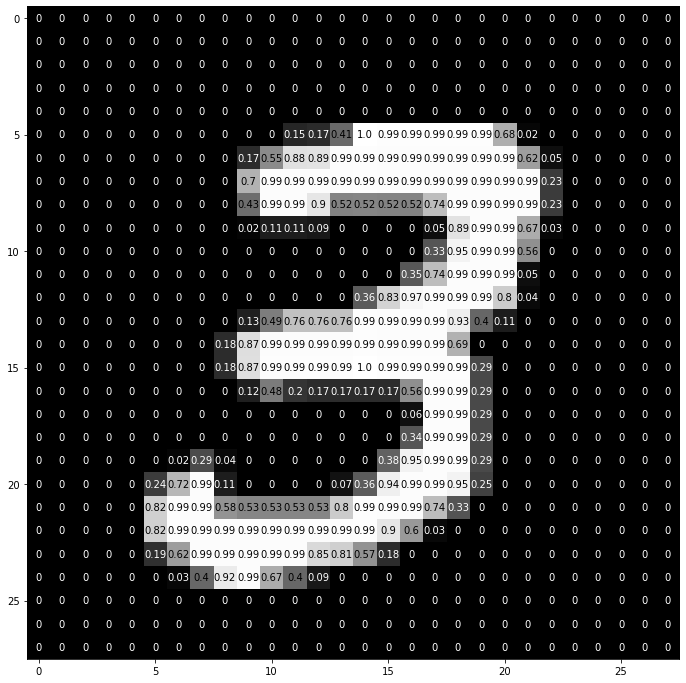

In [8]:
img = np.squeeze(images[7])
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

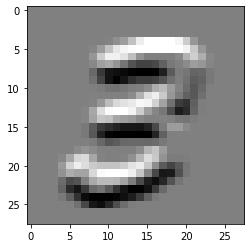

In [9]:
import cv2
sobel = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

img = np.squeeze(images[7])
filtered_image = cv2.filter2D(img, -1, sobel)

plt.imshow(filtered_image, cmap='gray')

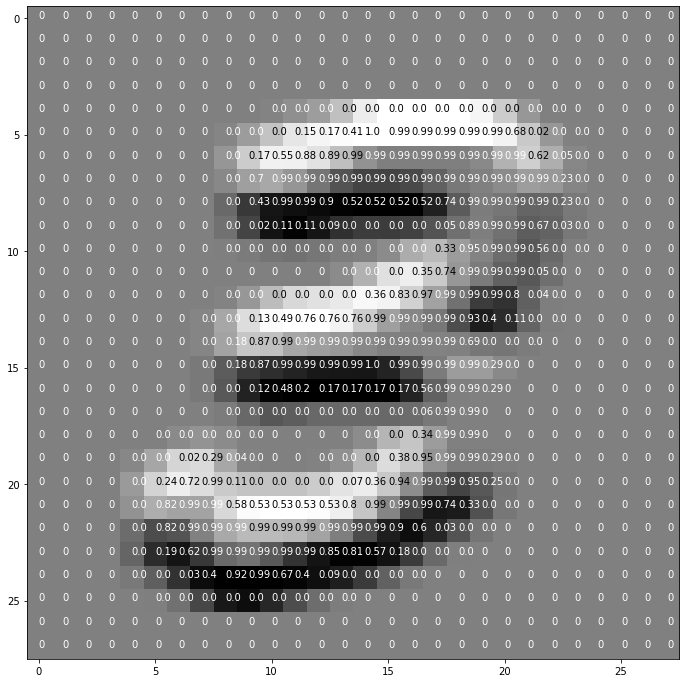

In [10]:
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(filtered_image, cmap='gray')
width, height = filtered_image.shape
thresh = filtered_image.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if filtered_image[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    color='white' if filtered_image[x][y]<thresh else 'black')

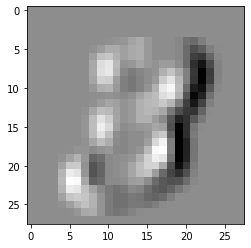

In [11]:
filter4x4 = filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])
img = np.squeeze(images[7])
filtered_image = cv2.filter2D(img, -1, filter4x4)
plt.imshow(filtered_image, cmap='gray')

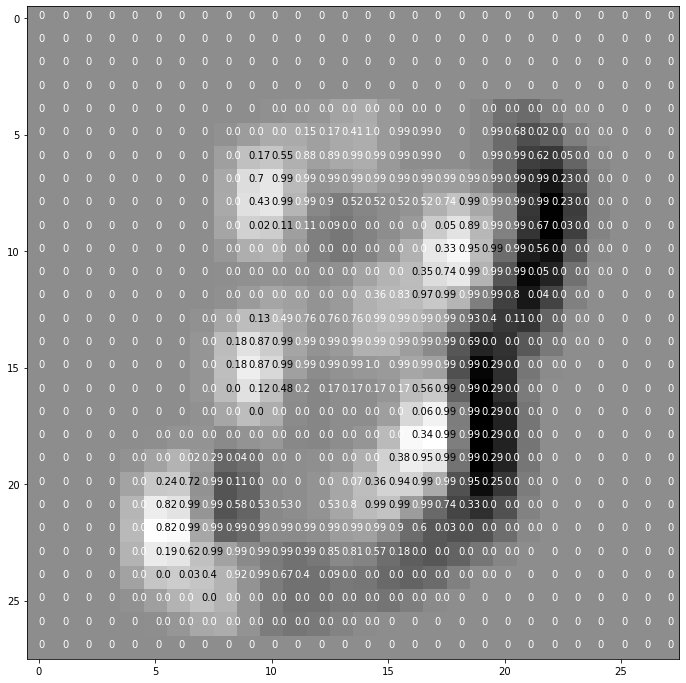

In [12]:
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(filtered_image, cmap='gray')
width, height = filtered_image.shape
thresh = filtered_image.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if filtered_image[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    color='white' if filtered_image[x][y]<thresh else 'black')